In [1]:
%%html
<style>
table {float:left}
</style>

# **Project #5: Stock Analysis** 
 --------------------------------------
### Working to find the best times to buy and sell a given stock
We will be working on this project until the end of the semester. There must be at least a total of 3 trades made throughout each week. The timeline chart will be updated as time goes by to keep track of the trades made in a given week
#### TimeLine:

| Week | Buy/Sell | Ticker | QTY | Price        |
| :--: | :------: | -----: | --: | -----------: |
| 1    |    Buy   |  DAL   | 10  |   \$46.78    |
| 1    |    Buy   |  BAC   | 10  |   \$40.66    |
| 1    |    Buy   |  MS    | 10  |   \$82.33    |
| 1    |    Buy   |  BBY   | 10  |  \$116.64    |
| 1    |    Buy   |  XM    | 15  |  \$37.85     |
| 1    |    Buy   |  PAYC  | 10  |  \$384.87    |
| 1    |    Buy   |  NXPI  | 15  |  \$192.55    |
| 1    |    Buy   |  NVDA  | 10  |  \$603.40    |



#### What do we know??
- Market is open at 9:30 a.m. to 4:00 p.m. Eastern time (6:30 a.m. to 1:00 p.m. PST). That is a total of 6.5 hours per day. There is room for some before and after hours trading depending on the market you are trading in. More Information at this link: https://investmentu.com/what-time-does-the-stock-market-open/
-  

#### Research about Stock Traders


## Start of Analysis
    To get started, I am trying to find some good stock that fits into the bullish market that we have. We want to trade some stocks that may be more violatile. We are given a time frame of about 3 to 4 weeks for this project and we want to try and maximize our profits. A good way to find stocks that fit this idea is to find stocks that are some of the most violatile. The BETA value can help deteremine whether a stock follows the normal market fluctuations. A beta lower than 1 indicates lower violatility, where higher than 1 indicates higher violatility when compared to the market as a whole. 
    
    We want to process the data to retrieve only the name of the company and the beta values. We then want to get all the companies that have a beta more than 1 because that implies that they are more violatile.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
from matplotlib import style

In [3]:
data = pd.read_csv('sp-500-index-04-29-2021.csv')
beta = data[['Symbol','Name', 'Beta']]
beta = beta.loc[beta['Beta'] > 1]
beta.head(500)

,Symbol,Name,Beta
0,A,Agilent Technologies,1.01
1,AAL,American Airlines Gp,1.93
2,AAP,Advance Auto Parts Inc,1.36
3,AAPL,Apple Inc,1.22
6,ABMD,Abiomed Inc,1.31
...,...,...,...
499,XYL,Xylem Inc,1.03
500,YUM,Yum! Brands,1.08
501,ZBH,Zimmer Biomet Holdings,1.32
502,ZBRA,Zebra Technologies,1.63


       The rest of the data is then put into a histogram plot to better visualize the data
 

(array([23., 16., 21., 15., 13., 12., 20., 13., 14., 12., 10.,  7., 14.,
         9., 12.,  7.,  9.,  6.,  4.,  6.,  5.,  4.,  1.,  3.,  1.,  3.,
         2.,  3.,  1.,  2.,  2.,  0.,  2.,  1.,  1.,  1.,  1.,  3.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.01  , 1.0495, 1.089 , 1.1285, 1.168 , 1.2075, 1.247 , 1.2865,
        1.326 , 1.3655, 1.405 , 1.4445, 1.484 , 1.5235, 1.563 , 1.6025,
        1.642 , 1.6815, 1.721 , 1.7605, 1.8   , 1.8395, 1.879 , 1.9185,
        1.958 , 1.9975, 2.037 , 2.0765, 2.116 , 2.1555, 2.195 , 2.2345,
        2.274 , 2.3135, 2.353 , 2.3925, 2.432 , 2.4715, 2.511 , 2.5505,
        2.59  , 2.6295, 2.669 , 2.7085, 2.748 , 2.7875, 2.827 , 2.8665,
  

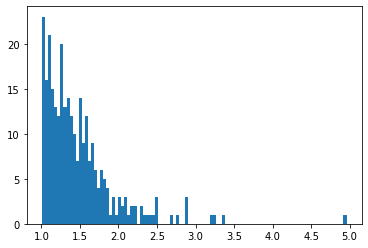

In [4]:
plt.hist(beta['Beta'],100)

    I would assume that is not the best to go with the most violatile stocks as they are more prone to instant change rather than gradual increase or decrease. I think a good starting place will be somewhere around the mean or median of the betas.

In [5]:
betaArray = beta['Beta']

total = 0;
count = betaArray.count()
for betas in betaArray:
    total = total + betas
mean = total / count
median = betaArray.median()
print("Mean : " + str(mean))
print("Median : " +str(median))

Mean : 1.4780208333333327
Median : 1.36


     I am going to pick stocks that follow this mean beta to start doing in depth analysis on. These will be the stocks that I will begin trading.

In [6]:
tradable = []
variance = 0.1

for betas in betaArray:
    if(betas < (mean+variance) and betas > (mean-variance)):
        tradable.append(betas)
print(tradable)  
print("Total number of stocks to choose from : " + str(len(tradable)))

[1.52, 1.5, 1.57, 1.56, 1.5, 1.52, 1.44, 1.5, 1.56, 1.44, 1.49, 1.56, 1.51, 1.57, 1.57, 1.44, 1.5, 1.38, 1.52, 1.4, 1.4, 1.4, 1.55, 1.56, 1.51, 1.48, 1.51, 1.47, 1.43, 1.57, 1.57, 1.48, 1.41, 1.38, 1.47, 1.41, 1.43, 1.4, 1.42, 1.54, 1.51, 1.38, 1.45, 1.53, 1.46, 1.44, 1.49, 1.54, 1.4, 1.45, 1.55, 1.5, 1.44]
Total number of stocks to choose from : 53


    There is a lot of repeats in the data that would make it hard to get the stocks because there would be repeated data. I will condense the data in the array so that we only check each value once.

In [7]:
tradableCondensed = pd.unique(tradable)
print(tradableCondensed)

[1.52 1.5  1.57 1.56 1.44 1.49 1.51 1.38 1.4  1.55 1.48 1.47 1.43 1.41
 1.42 1.54 1.45 1.53 1.46]


In [8]:
stocks = pd.DataFrame(columns = beta.columns)
for b in tradableCondensed:
    temp = beta.loc[beta['Beta'] == b]
    stocks = stocks.append(temp)

pd.set_option('display.max_rows', None)
stocks.head(100)  

,Symbol,Name,Beta
22,ALB,Albemarle Corp,1.52
115,CTAS,Cintas Corp,1.52
213,HBI,Hanesbrands Inc,1.52
28,AMAT,Applied Materials,1.50
81,CBRE,CBRE Group Inc,1.50
124,DAL,Delta Air Lines Inc,1.50
208,GS,Goldman Sachs Group,1.50
487,WMB,Williams Companies,1.50
55,BAC,Bank of America Corp,1.57
184,FITB,Fifth Third Bncp,1.57


    These are the the tickers that I will choose to base my future trades on. I will pick a handful of them to intialily invest in and do more analysis as time goes by.
    

In [9]:
tickerArray = []
for s in stocks["Symbol"]:
    tickerArray.append(s)
print(tickerArray)

['ALB', 'CTAS', 'HBI', 'AMAT', 'CBRE', 'DAL', 'GS', 'WMB', 'BAC', 'FITB', 'FLIR', 'MHK', 'MS', 'BBY', 'DD', 'DRI', 'KEY', 'CTLT', 'DISCA', 'FLT', 'SYY', 'XOM', 'DISCK', 'TPR', 'EMN', 'KIM', 'LEN', 'RL', 'HBAN', 'NVDA', 'ROK', 'HST', 'IPGP', 'IQV', 'PNC', 'VFC', 'IR', 'VTRS', 'LEG', 'NLSN', 'LVS', 'NXPI', 'LYV', 'PHM', 'NUE', 'PAYC', 'QRVO', 'RF', 'TRMB', 'RTX', 'VNO', 'SPG', 'SWK']


### Tickers Im going to Follow:

In [10]:
tickersFollow = [124,55,316,427,497,341,399,346,355,404,416]
follow = pd.DataFrame(columns = beta.columns)
for i in range(len(stocks)):
    if stocks.index[i] in tickersFollow:
        follow = follow.append(stocks.iloc[i])
follow

,Symbol,Name,Beta
124,DAL,Delta Air Lines Inc,1.50
55,BAC,Bank of America Corp,1.57
316,MS,Morgan Stanley,1.57
427,SYY,Sysco Corp,1.44
497,XOM,Exxon Mobil Corp,1.44
341,NVDA,Nvidia Corp,1.38
399,ROK,Rockwell Automation Inc,1.38
346,NXPI,Nxp Semiconductors,1.47
355,PAYC,Paycom Software Inc,1.41
404,RTX,Raytheon Technologies Corp,1.45


    Because I am making my first trades based off how violtile the stocks are, It is good to have diversity in your portfilo because violtility can be in the upward or downward direction. Having more stocks in the beginning allows for safer start. 
    
  

### Week 2 
##### This week we can start diving into some details about specitic stocks so we can have more info to use to trade that stock with.
##### I am going to focus on looking into Bank of America (BAC) as my first stock to do some deeper data analysis.

In [11]:
style.use('ggplot')

startDate = dt.datetime(2020, 1,1)
endDate = dt.datetime(2021,5,5)

df = web.DataReader('BAC', 'yahoo', startDate, endDate)
print(df.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2020-01-02  35.660000  35.290001  35.349998  35.639999  37614200.0  34.537598
2020-01-03  35.150002  34.759998  34.980000  34.900002  50357900.0  33.820488
2020-01-06  34.900002  34.369999  34.410000  34.849998  42185000.0  33.772030
2020-01-07  34.919998  34.529999  34.700001  34.619999  34149000.0  33.549149
2020-01-08  35.189999  34.549999  34.570000  34.970001  45311600.0  33.888321


In [12]:
df['Swing %'] = (df['High']-df['Low']) / df['Low'] * 100
df['Daily % Change'] = (df['Close']-df['Open']) / df['Open'] * 100
df = df[['Close','Daily % Change','Swing %','Volume']]
print(df.head())

                Close  Daily % Change   Swing %      Volume
Date                                                       
2020-01-02  35.639999        0.820370  1.048453  37614200.0
2020-01-03  34.900002       -0.228696  1.121989  50357900.0
2020-01-06  34.849998        1.278694  1.542050  42185000.0
2020-01-07  34.619999       -0.230553  1.129451  34149000.0
2020-01-08  34.970001        1.157077  1.852386  45311600.0


In [13]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.mean()

Close                  28.74
Daily % Change          0.04
Swing %                 3.07
Volume           64436479.59
dtype: float64

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,
         1.,  0.,  0.,  1.,  1.,  1.,  1.,  4.,  3.,  2.,  6.,  4.,  6.,
         6.,  3.,  4.,  5.,  7., 14.,  9.,  6., 18., 12., 18., 17., 15.,
        16., 17., 14., 11., 17., 19.,  9.,  5.,  4.,  9.,  6.,  5.,  9.,
         3.,  0.,  0.,  5.,  1.,  1.,  1.,  2.,  0.,  3.,  3.,  0.,  3.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([-9.60478001e+00, -9.41995352e+00, -9.23512702e+00, -9.05030052e+00,
        -8.86547403e+00, -8.68064753e+00, -8.49582103e+00, -8.31099454e+00,
        -8.12616804e+00, -7.94134155e+00, -7.75651505e+00, -7.57168855e+00,
        -7.38686206e+00, -7.20203556e+00, -7.01720907e+00, -6.83238257e+00,
        -6.64755607e+00, -6.46272958e+00, -6.27790308e+00, -6.09307658e+00,
        -5.90825009e+00, -5.72342359e+00, -5.53859710e

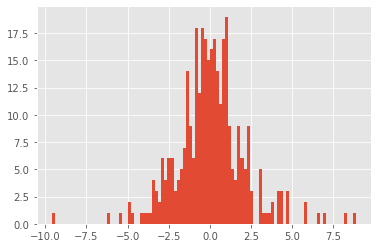

In [14]:
plt.hist(df['Daily % Change'],100)

In [15]:
weekDays = [0] * 5
numDays = [0] * 5
for i in range(len(df)):
    dayindex = df.index[i].weekday()
    
    if dayindex == 0:
        weekDays[0] = weekDays[0] + df.iloc[dayindex]
        numDays[0] = numDays[0] + 1
    elif dayindex == 1:
        weekDays[1] = weekDays[1] + df.iloc[dayindex]
        numDays[1] = numDays[1] + 1
    elif dayindex == 2:
        weekDays[2] = weekDays[2] + df.iloc[dayindex]
        numDays[2] = numDays[2] + 1
    elif dayindex == 3:
        weekDays[3] = weekDays[3] + df.iloc[dayindex]
        numDays[3] = numDays[3] + 1
    elif dayindex == 4:
        weekDays[4] = weekDays[4] + df.iloc[dayindex]
        numDays[4] = numDays[4] + 1
print(weekDays) 
print(numDays)

[Close                  2280.96
Daily % Change           52.50
Swing %                  67.10
Volume           2407308800.00
Name: 2020-01-02 00:00:00, dtype: float64, Close                  2443.00
Daily % Change          -16.01
Swing %                  78.54
Volume           3525053000.00
Name: 2020-01-03 00:00:00, dtype: float64, Close                  2439.50
Daily % Change           89.51
Swing %                 107.94
Volume           2952950000.00
Name: 2020-01-06 00:00:00, dtype: float64, Close                  2388.78
Daily % Change          -15.91
Swing %                  77.93
Volume           2356281000.00
Name: 2020-01-07 00:00:00, dtype: float64, Close                  2273.05
Daily % Change           75.21
Swing %                 120.41
Volume           2945254000.00
Name: 2020-01-08 00:00:00, dtype: float64]
[64, 70, 70, 69, 65]


In [16]:
avg = [0]*5
for i in range(len(weekDays)):
    avg[i] = weekDays[i]['Daily % Change'] / numDays[i]
print(avg)

[0.8203703763654953, -0.22869644769671596, 1.2786940675969691, -0.2305528221778362, 1.1570770304021551]


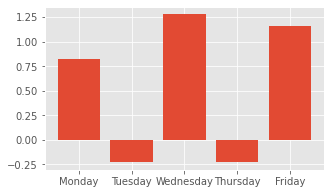

In [17]:
fig, ax = plt.subplots(figsize = (5,3))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
ax.bar(days,avg)
plt.show()

    From this graph, we can conclude that the best days to sell BAC stock is on Mondays, Wednesdays, and Fridays. With Tuesday and Thursday being the best days on average to buy BAC. Because of this, I will buy some BAC on this Thurday and sell it out sometime next week on Wednesday if it is up on the day.
#### Now I can repeat for some of the other stocks I am watching

    We will take a look at NVDA
    

In [18]:
style.use('ggplot')

startDate = dt.datetime(2020, 1,1)
endDate = dt.datetime(2021,5,5)

df = web.DataReader('NVDA', 'yahoo', startDate, endDate)
print(df.head())

             High    Low   Open  Close     Volume  Adj Close
Date                                                        
2020-01-02 239.91 236.72 238.75 239.91 5938400.00     239.43
2020-01-03 237.83 234.10 235.10 236.07 5134600.00     235.60
2020-01-06 237.27 231.27 232.32 237.06 6565900.00     236.59
2020-01-07 241.77 236.39 238.20 239.93 7871400.00     239.45
2020-01-08 242.04 238.15 239.76 240.38 6927700.00     239.90


In [19]:
df['Swing %'] = (df['High']-df['Low']) / df['Low'] * 100
df['Daily % Change'] = (df['Close']-df['Open']) / df['Open'] * 100
df = df[['Close','Daily % Change','Swing %','Volume']]
print(df.head())

            Close  Daily % Change  Swing %     Volume
Date                                                 
2020-01-02 239.91            0.49     1.35 5938400.00
2020-01-03 236.07            0.41     1.59 5134600.00
2020-01-06 237.06            2.04     2.59 6565900.00
2020-01-07 239.93            0.73     2.28 7871400.00
2020-01-08 240.38            0.26     1.63 6927700.00


In [20]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.mean()

Close                 435.63
Daily % Change          0.09
Swing %                 3.89
Volume           11076864.50
dtype: float64

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  4.,
         1.,  1.,  4.,  1.,  0.,  3.,  3.,  2.,  4.,  5.,  4.,  3.,  5.,
         5.,  2.,  3.,  6.,  8.,  5.,  9., 13., 11., 12., 14.,  4., 19.,
         8., 11., 11., 14.,  7.,  9.,  8.,  9., 11.,  7.,  8.,  9., 10.,
         7.,  8.,  4.,  5.,  5.,  5.,  1.,  3.,  3.,  4.,  1.,  1.,  1.,
         0.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-7.53731439, -7.34806679, -7.15881919, -6.9695716 , -6.780324  ,
        -6.5910764 , -6.40182881, -6.21258121, -6.02333361, -5.83408602,
        -5.64483842, -5.45559082, -5.26634323, -5.07709563, -4.88784803,
        -4.69860044, -4.50935284, -4.32010524, -4.13085765, -3.94161005,
        -3.75236245, -3.56311486, -3.37386726, -3.18461966, -2.99537207,
        -2.80612447, -2.61687687, -2.42762927, -2.23838168, -2.049134

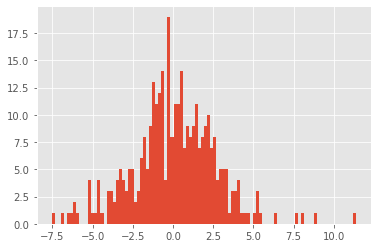

In [21]:
plt.hist(df['Daily % Change'],100)

In [22]:
weekDays = [0] * 5
numDays = [0] * 5
for i in range(len(df)):
    dayindex = df.index[i].weekday()
    
    if dayindex == 0:
        weekDays[0] = weekDays[0] + df.iloc[dayindex]
        numDays[0] = numDays[0] + 1
    elif dayindex == 1:
        weekDays[1] = weekDays[1] + df.iloc[dayindex]
        numDays[1] = numDays[1] + 1
    elif dayindex == 2:
        weekDays[2] = weekDays[2] + df.iloc[dayindex]
        numDays[2] = numDays[2] + 1
    elif dayindex == 3:
        weekDays[3] = weekDays[3] + df.iloc[dayindex]
        numDays[3] = numDays[3] + 1
    elif dayindex == 4:
        weekDays[4] = weekDays[4] + df.iloc[dayindex]
        numDays[4] = numDays[4] + 1
print(weekDays) 
print(numDays)

[Close                15354.24
Daily % Change          31.10
Swing %                 86.25
Volume           380057600.00
Name: 2020-01-02 00:00:00, dtype: float64, Close                16524.90
Daily % Change          28.88
Swing %                111.53
Volume           359422000.00
Name: 2020-01-03 00:00:00, dtype: float64, Close                16594.20
Daily % Change         142.82
Swing %                181.61
Volume           459613000.00
Name: 2020-01-06 00:00:00, dtype: float64, Close                16555.17
Daily % Change          50.11
Swing %                157.04
Volume           543126600.00
Name: 2020-01-07 00:00:00, dtype: float64, Close                15624.70
Daily % Change          16.81
Swing %                106.17
Volume           450300500.00
Name: 2020-01-08 00:00:00, dtype: float64]
[64, 70, 70, 69, 65]


In [23]:
avg = [0]*5
for i in range(len(weekDays)):
    avg[i] = weekDays[i]['Daily % Change'] / numDays[i]
print(avg)

[0.48586540821335045, 0.41259089558510176, 2.0402849883522998, 0.7262786522683988, 0.2585962588345345]


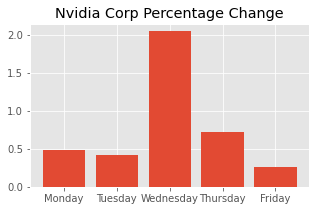

In [24]:
fig, ax = plt.subplots(figsize = (5,3))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
ax.bar(days,avg)
plt.title(follow.iloc[5]['Name'] + " Percentage Change")
plt.show()

    From this graph, we can see that all the days on average come out to be positive, with Friday being the lowest of all the days. Because of this, we will schedule a trade to buy NVDA on Friday of this week and see if we get any good return by wednesday of the next week, as it shows it is on average the has the most positive percentage change by the end of the day.

### Week 3 
##### I want to look into all the other stocks that I have in my portflio and do the same analysis as last week to start. 


            High   Low  Open  Close     Volume  Adj Close
Date                                                     
2020-01-02 59.39 58.45 58.93  59.04 4459200.00      58.63
2020-01-03 58.12 56.91 57.50  58.06 9078100.00      57.66
2020-01-06 57.76 56.66 56.99  57.66 5504300.00      57.26
2020-01-07 58.07 57.47 57.91  57.61 5563000.00      57.21
2020-01-08 59.40 57.73 57.75  58.85 8519000.00      58.45
            Close  Daily % Change  Swing %     Volume
Date                                                 
2020-01-02  59.04            0.19     1.61 4459200.00
2020-01-03  58.06            0.97     2.13 9078100.00
2020-01-06  57.66            1.18     1.94 5504300.00
2020-01-07  57.61           -0.52     1.04 5563000.00
2020-01-08  58.85            1.90     2.89 8519000.00
[Close                 3778.56
Daily % Change          11.95
Swing %                102.93
Volume           285388800.00
Name: 2020-01-02 00:00:00, dtype: float64, Close                 4064.20
Daily % Change        

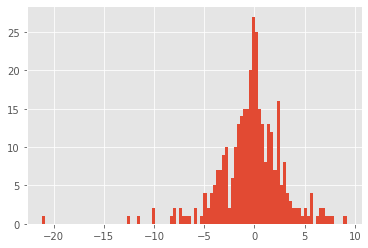

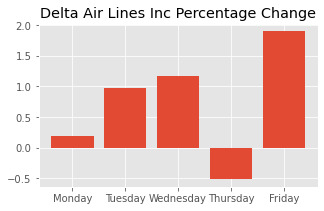

In [25]:
style.use('ggplot')

startDate = dt.datetime(2020, 1,1)
endDate = dt.datetime(2021,5,5)

df = web.DataReader('DAL', 'yahoo', startDate, endDate)
print(df.head())

df['Swing %'] = (df['High']-df['Low']) / df['Low'] * 100
df['Daily % Change'] = (df['Close']-df['Open']) / df['Open'] * 100
df = df[['Close','Daily % Change','Swing %','Volume']]
print(df.head())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.mean()

plt.hist(df['Daily % Change'],100)

weekDays = [0] * 5
numDays = [0] * 5
for i in range(len(df)):
    dayindex = df.index[i].weekday()
    
    if dayindex == 0:
        weekDays[0] = weekDays[0] + df.iloc[dayindex]
        numDays[0] = numDays[0] + 1
    elif dayindex == 1:
        weekDays[1] = weekDays[1] + df.iloc[dayindex]
        numDays[1] = numDays[1] + 1
    elif dayindex == 2:
        weekDays[2] = weekDays[2] + df.iloc[dayindex]
        numDays[2] = numDays[2] + 1
    elif dayindex == 3:
        weekDays[3] = weekDays[3] + df.iloc[dayindex]
        numDays[3] = numDays[3] + 1
    elif dayindex == 4:
        weekDays[4] = weekDays[4] + df.iloc[dayindex]
        numDays[4] = numDays[4] + 1
print(weekDays) 
print(numDays)

avg = [0]*5
for i in range(len(weekDays)):
    avg[i] = weekDays[i]['Daily % Change'] / numDays[i]
print(avg)

fig, ax = plt.subplots(figsize = (5,3))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
ax.bar(days,avg)
plt.title(follow.iloc[0]['Name'] + " Percentage Change")
plt.show()

    Based on the graph, Thursday is the best day to buy DAL stock and Friday is one of the best days to sell on average. I am planning to buy some DAL this Thursday.

            High   Low  Open  Close     Volume  Adj Close
Date                                                     
2020-01-02 52.06 51.17 51.20  52.04 7808000.00      50.05
2020-01-03 51.45 50.83 51.22  51.20 6706000.00      49.24
2020-01-06 51.04 50.46 50.67  51.02 7476700.00      49.07
2020-01-07 51.19 50.71 51.04  50.92 4538100.00      48.97
2020-01-08 51.79 50.90 50.96  51.57 6185200.00      49.60
            Close  Daily % Change  Swing %     Volume
Date                                                 
2020-01-02  52.04            1.64     1.74 7808000.00
2020-01-03  51.20           -0.04     1.22 6706000.00
2020-01-06  51.02            0.69     1.15 7476700.00
2020-01-07  50.92           -0.24     0.95 4538100.00
2020-01-08  51.57            1.20     1.75 6185200.00
[Close                 3330.56
Daily % Change         105.00
Swing %                111.32
Volume           499712000.00
Name: 2020-01-02 00:00:00, dtype: float64, Close                 3584.00
Daily % Change        

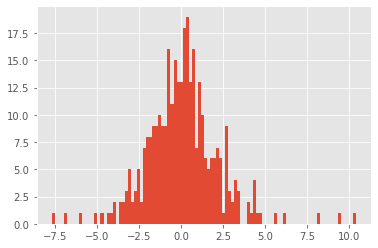

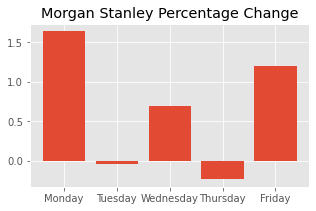

In [26]:
style.use('ggplot')

startDate = dt.datetime(2020, 1,1)
endDate = dt.datetime(2021,5,5)

df = web.DataReader('MS', 'yahoo', startDate, endDate)
print(df.head())

df['Swing %'] = (df['High']-df['Low']) / df['Low'] * 100
df['Daily % Change'] = (df['Close']-df['Open']) / df['Open'] * 100
df = df[['Close','Daily % Change','Swing %','Volume']]
print(df.head())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.mean()

plt.hist(df['Daily % Change'],100)

weekDays = [0] * 5
numDays = [0] * 5
for i in range(len(df)):
    dayindex = df.index[i].weekday()
    
    if dayindex == 0:
        weekDays[0] = weekDays[0] + df.iloc[dayindex]
        numDays[0] = numDays[0] + 1
    elif dayindex == 1:
        weekDays[1] = weekDays[1] + df.iloc[dayindex]
        numDays[1] = numDays[1] + 1
    elif dayindex == 2:
        weekDays[2] = weekDays[2] + df.iloc[dayindex]
        numDays[2] = numDays[2] + 1
    elif dayindex == 3:
        weekDays[3] = weekDays[3] + df.iloc[dayindex]
        numDays[3] = numDays[3] + 1
    elif dayindex == 4:
        weekDays[4] = weekDays[4] + df.iloc[dayindex]
        numDays[4] = numDays[4] + 1
print(weekDays) 
print(numDays)

avg = [0]*5
for i in range(len(weekDays)):
    avg[i] = weekDays[i]['Daily % Change'] / numDays[i]
print(avg)

fig, ax = plt.subplots(figsize = (5,3))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
ax.bar(days,avg)
plt.title(follow.iloc[2]['Name'] + " Percentage Change")
plt.show()

    Based on the graph, Thursday is the best day to buy MS stock and Monday is one of the best days to sell on average.

            High   Low  Open  Close     Volume  Adj Close
Date                                                     
2020-01-02 85.13 83.98 85.06  84.66 2121900.00      81.51
2020-01-03 84.72 83.93 84.20  84.35 1759900.00      81.21
2020-01-06 84.25 83.50 84.15  84.24 1916800.00      81.11
2020-01-07 84.35 83.40 84.24  83.56 1701400.00      80.45
2020-01-08 84.96 83.62 83.89  84.53 2945900.00      81.38
            Close  Daily % Change  Swing %     Volume
Date                                                 
2020-01-02  84.66           -0.47     1.37 2121900.00
2020-01-03  84.35            0.18     0.94 1759900.00
2020-01-06  84.24            0.11     0.90 1916800.00
2020-01-07  83.56           -0.81     1.14 1701400.00
2020-01-08  84.53            0.76     1.60 2945900.00
[Close                 5418.24
Daily % Change         -30.10
Swing %                 87.64
Volume           135801600.00
Name: 2020-01-02 00:00:00, dtype: float64, Close                 5904.50
Daily % Change        

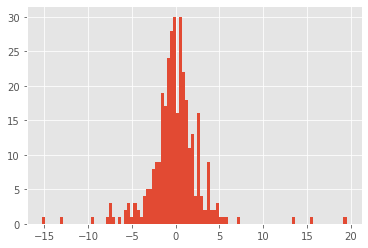

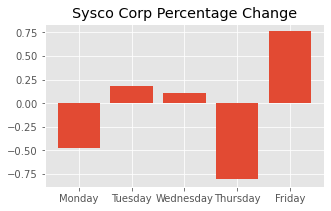

In [27]:
style.use('ggplot')

startDate = dt.datetime(2020, 1,1)
endDate = dt.datetime(2021,5,5)

df = web.DataReader('SYY', 'yahoo', startDate, endDate)
print(df.head())

df['Swing %'] = (df['High']-df['Low']) / df['Low'] * 100
df['Daily % Change'] = (df['Close']-df['Open']) / df['Open'] * 100
df = df[['Close','Daily % Change','Swing %','Volume']]
print(df.head())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.mean()

plt.hist(df['Daily % Change'],100)

weekDays = [0] * 5
numDays = [0] * 5
for i in range(len(df)):
    dayindex = df.index[i].weekday()
    
    if dayindex == 0:
        weekDays[0] = weekDays[0] + df.iloc[dayindex]
        numDays[0] = numDays[0] + 1
    elif dayindex == 1:
        weekDays[1] = weekDays[1] + df.iloc[dayindex]
        numDays[1] = numDays[1] + 1
    elif dayindex == 2:
        weekDays[2] = weekDays[2] + df.iloc[dayindex]
        numDays[2] = numDays[2] + 1
    elif dayindex == 3:
        weekDays[3] = weekDays[3] + df.iloc[dayindex]
        numDays[3] = numDays[3] + 1
    elif dayindex == 4:
        weekDays[4] = weekDays[4] + df.iloc[dayindex]
        numDays[4] = numDays[4] + 1
print(weekDays) 
print(numDays)

avg = [0]*5
for i in range(len(weekDays)):
    avg[i] = weekDays[i]['Daily % Change'] / numDays[i]
print(avg)

fig, ax = plt.subplots(figsize = (5,3))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
ax.bar(days,avg)
plt.title(follow.iloc[3]['Name'] + " Percentage Change")
plt.show()

    Based on the graph, Thursday is the best day to buy SYY stock and Friday is one of the best days to sell on average. This stock looks to have a more negative trend comparied to the other stocks
    

            High   Low  Open  Close      Volume  Adj Close
Date                                                      
2020-01-02 71.02 70.24 70.24  70.90 12456400.00      63.63
2020-01-03 71.37 70.16 71.34  70.33 17386900.00      63.12
2020-01-06 71.36 70.23 70.32  70.87 20081900.00      63.61
2020-01-07 70.52 69.51 70.50  70.29 17387700.00      63.09
2020-01-08 70.29 69.17 70.11  69.23 15137700.00      62.13
            Close  Daily % Change  Swing %      Volume
Date                                                  
2020-01-02  70.90            0.94     1.11 12456400.00
2020-01-03  70.33           -1.42     1.72 17386900.00
2020-01-06  70.87            0.78     1.61 20081900.00
2020-01-07  70.29           -0.30     1.45 17387700.00
2020-01-08  69.23           -1.26     1.62 15137700.00
[Close                 4537.60
Daily % Change          60.14
Swing %                 71.07
Volume           797209600.00
Name: 2020-01-02 00:00:00, dtype: float64, Close                  4923.10
Daily %

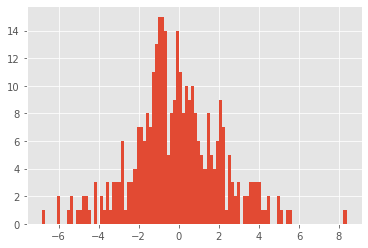

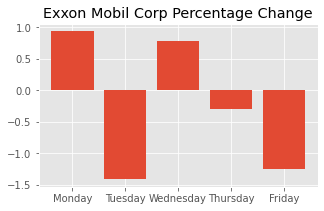

In [28]:
style.use('ggplot')

startDate = dt.datetime(2020, 1,1)
endDate = dt.datetime(2021,5,5)

df = web.DataReader('XOM', 'yahoo', startDate, endDate)
print(df.head())

df['Swing %'] = (df['High']-df['Low']) / df['Low'] * 100
df['Daily % Change'] = (df['Close']-df['Open']) / df['Open'] * 100
df = df[['Close','Daily % Change','Swing %','Volume']]
print(df.head())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.mean()

plt.hist(df['Daily % Change'],100)

weekDays = [0] * 5
numDays = [0] * 5
for i in range(len(df)):
    dayindex = df.index[i].weekday()
    
    if dayindex == 0:
        weekDays[0] = weekDays[0] + df.iloc[dayindex]
        numDays[0] = numDays[0] + 1
    elif dayindex == 1:
        weekDays[1] = weekDays[1] + df.iloc[dayindex]
        numDays[1] = numDays[1] + 1
    elif dayindex == 2:
        weekDays[2] = weekDays[2] + df.iloc[dayindex]
        numDays[2] = numDays[2] + 1
    elif dayindex == 3:
        weekDays[3] = weekDays[3] + df.iloc[dayindex]
        numDays[3] = numDays[3] + 1
    elif dayindex == 4:
        weekDays[4] = weekDays[4] + df.iloc[dayindex]
        numDays[4] = numDays[4] + 1
print(weekDays) 
print(numDays)

avg = [0]*5
for i in range(len(weekDays)):
    avg[i] = weekDays[i]['Daily % Change'] / numDays[i]
print(avg)

fig, ax = plt.subplots(figsize = (5,3))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
ax.bar(days,avg)
plt.title(follow.iloc[4]['Name'] + " Percentage Change")
plt.show()

    Based on the graph, Tuesday is the best day to buy XOM stock and Monday is one of the best days to sell on average. This stock also looks to have a more negative trend comparied to the other stocks and is not something that would be most profitable in the long run.

             High    Low   Open  Close     Volume  Adj Close
Date                                                        
2020-01-02 205.64 202.60 203.82 205.64  638200.00     200.01
2020-01-03 203.23 200.51 201.91 202.64  542600.00     197.09
2020-01-06 204.32 200.92 201.48 204.25 1006900.00     198.66
2020-01-07 205.27 202.25 204.50 203.83  708700.00     198.25
2020-01-08 206.80 200.52 202.78 205.38  671100.00     199.76
            Close  Daily % Change  Swing %     Volume
Date                                                 
2020-01-02 205.64            0.89     1.50  638200.00
2020-01-03 202.64            0.36     1.36  542600.00
2020-01-06 204.25            1.37     1.69 1006900.00
2020-01-07 203.83           -0.33     1.49  708700.00
2020-01-08 205.38            1.28     3.13  671100.00
[Close               13160.96
Daily % Change         57.15
Swing %                96.03
Volume           40844800.00
Name: 2020-01-02 00:00:00, dtype: float64, Close               14184.80
Daily 

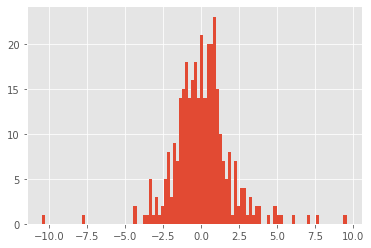

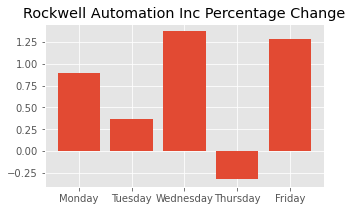

In [29]:
style.use('ggplot')

startDate = dt.datetime(2020, 1,1)
endDate = dt.datetime(2021,5,5)

df = web.DataReader('ROK', 'yahoo', startDate, endDate)
print(df.head())

df['Swing %'] = (df['High']-df['Low']) / df['Low'] * 100
df['Daily % Change'] = (df['Close']-df['Open']) / df['Open'] * 100
df = df[['Close','Daily % Change','Swing %','Volume']]
print(df.head())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.mean()

plt.hist(df['Daily % Change'],100)

weekDays = [0] * 5
numDays = [0] * 5
for i in range(len(df)):
    dayindex = df.index[i].weekday()
    
    if dayindex == 0:
        weekDays[0] = weekDays[0] + df.iloc[dayindex]
        numDays[0] = numDays[0] + 1
    elif dayindex == 1:
        weekDays[1] = weekDays[1] + df.iloc[dayindex]
        numDays[1] = numDays[1] + 1
    elif dayindex == 2:
        weekDays[2] = weekDays[2] + df.iloc[dayindex]
        numDays[2] = numDays[2] + 1
    elif dayindex == 3:
        weekDays[3] = weekDays[3] + df.iloc[dayindex]
        numDays[3] = numDays[3] + 1
    elif dayindex == 4:
        weekDays[4] = weekDays[4] + df.iloc[dayindex]
        numDays[4] = numDays[4] + 1
print(weekDays) 
print(numDays)

avg = [0]*5
for i in range(len(weekDays)):
    avg[i] = weekDays[i]['Daily % Change'] / numDays[i]
print(avg)

fig, ax = plt.subplots(figsize = (5,3))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
ax.bar(days,avg)
plt.title(follow.iloc[6]['Name'] + " Percentage Change")
plt.show()

    Based on the graph, Thursday is the best day to buy ROK stock and Wednesday is one of the best days to sell on average.

### Week 4 (Final Week)
    To finish off this project. I am going to try to predit the future with some machine learning using the past stock data. I want to take a look into Delta Airlines as they are the company that I have gained the most profit from.

In [124]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

startDate = dt.datetime(2020, 1,1)
endDate = dt.datetime(2021, 5, 5)

df = web.DataReader('DAL', 'yahoo', startDate, endDate)
print(df.head())

# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 30

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

            High   Low  Open  Close     Volume  Adj Close
Date                                                     
2020-01-02 59.39 58.45 58.93  59.04 4459200.00      58.63
2020-01-03 58.12 56.91 57.50  58.06 9078100.00      57.66
2020-01-06 57.76 56.66 56.99  57.66 5504300.00      57.26
2020-01-07 58.07 57.47 57.91  57.61 5563000.00      57.21
2020-01-08 59.40 57.73 57.75  58.85 8519000.00      58.45


In [129]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
          
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=75, batch_size=5)



Epoch 1/75
62/62 [==============================] - 9s 22ms/step - loss: 0.0304
Epoch 2/75
62/62 [==============================] - 1s 21ms/step - loss: 0.0128
Epoch 3/75
62/62 [==============================] - 1s 22ms/step - loss: 0.0101
Epoch 4/75
62/62 [==============================] - 1s 22ms/step - loss: 0.0095
Epoch 5/75
62/62 [==============================] - 1s 21ms/step - loss: 0.0082
Epoch 6/75
62/62 [==============================] - 1s 22ms/step - loss: 0.0073
Epoch 7/75
62/62 [==============================] - 1s 21ms/step - loss: 0.0081
Epoch 8/75
62/62 [==============================] - 2s 24ms/step - loss: 0.0082
Epoch 9/75
62/62 [==============================] - 2s 24ms/step - loss: 0.0086
Epoch 10/75
62/62 [==============================] - 2s 35ms/step - loss: 0.0066
Epoch 11/75
62/62 [==============================] - 2s 24ms/step - loss: 0.0071
Epoch 12/75
62/62 [==============================] - 1s 22ms/step - loss: 0.0081
Epoch 13/75
62/62 [==================

22


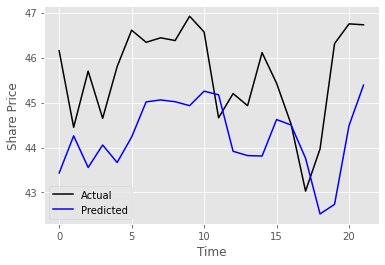

In [130]:
# Testing and Visualizing
test_start = dt.datetime(2021,4,18)
test_end = dt.datetime.now()

testData = web.DataReader('DAL', 'yahoo', test_start, test_end)
actual_prices = testData['Close'].values

total_dataset = pd.concat((df['Close'], testData['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)- len(testData) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
print(len(x_test))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

plt.plot(actual_prices, color = 'black', label=f"Actual")
plt.plot(predicted_prices, color = 'blue', label=f"Predicted")
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
plt.show()